<a href="https://colab.research.google.com/github/andrewlee-29/Applied_Deep_Learning_2023Summer/blob/main/Week%202%3A%20Intro_to_NN_with_Keras_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to NN with Keras

- Design our fist neural net to solve a regression problem
- Introduce tensorflow's Keras library
- Evaluating trained model
- Visualizing the loss
- Improvements:
  - Hidden layers
  - Pre-processing: Scaling
  - Dropout


### Review of SciKit API

According to VanderPlas (2016):
1. Choose a class of model by **importing the appropriate estimator** class from Scikit-Learn.
2. Choose model **hyperparameters** by instantiating this class with desired values.
3. Arrange data into a **features matrix and target vector** following the discussion above.
4. **Fit the model** to your data by calling the ``fit()`` method of the model instance.
5. **Apply the model** to new data:
   - For supervised learning, often we predict labels for unknown data using the ``predict()`` method.
   - For unsupervised learning, we often transform or infer properties of the data using the ``transform()`` or ``predict()`` method. (p. 347)
   
   
``` python
from sklearn.svm import SVC #1
model = SVC(kernel='linear') #2

Xtrain, Xtest, ytrain, ytest = train_test_split(data.features, data.labels) #3a/b

model.fit(Xtrain, ytrain) #4

y_model = model.predict(Xtest) #5
```

VanderPlas, J. (2016). Python data science handbook: Essential tools for working with data. Sebastopol, CA: O'Reilly Media.

## Linear Regression

Hypothesis

$h(x) = \sum_{i=1}^n wx_i $

Prediction art

$x_0 \rightarrow w_0 \searrow $

$x_1 \rightarrow w_1 \rightarrow $   $\sum \longrightarrow $ h(x)

$\ldots$

$x_m \rightarrow w_m \nearrow $

[Cost function](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)

## Classification via Logistic Regression

Hypothesis

Let $y = \{-1, 1 \}$ or $y = \{0, 1 \}$


$ h(x) = \text{sigmoid}(\sum_{i=1}^n wx_i ) $

Prediction art

$x_0 \rightarrow w_0 \searrow $

$x_1 \rightarrow w_1 \rightarrow $   $\sum  \rightarrow$ Sigmoid() $\longrightarrow $ h(x)

$\ldots$

$x_m \rightarrow w_m \nearrow $



# Regression: Housing Cost Prediciton

- Linear Regression approach via Scikit
- NN via tf.Keras

In [1]:
#BOS discontinued. need earlier scikit
!pip install scikit-learn==1.1.3
#restart runtime when asked

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 18.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
%matplotlib inline
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_boston
#Boston housing prices
boston = load_boston()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:
#Format: Dictionary
print(boston.keys())
#Size it up
print(boston.data.shape)
#What are the 13 features?
print(boston.feature_names)

boston.target.shape


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


(506,)

In [5]:
X = boston.data
y = boston.target
print(X.shape, y.shape)

(506, 13) (506,)


In [7]:
#split into Train / Test data:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,random_state=42)

print(Xtrain.shape, ytrain.shape)

(379, 13) (379,)


# Linear Regression with the data

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(Xtrain, ytrain)

#Note: if error: you may need np.asarray(...,dtype=np.float64)


LinearRegression(fit_intercept=False)

MAE:  26.23519748421417


Text(0.5, 1.0, 'Boston Housing True vs Predicted prices')

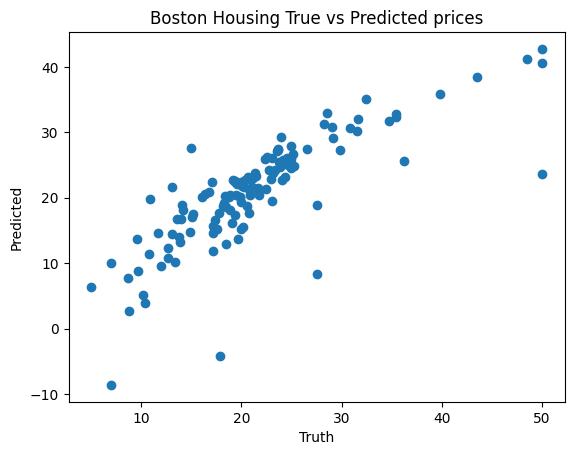

In [9]:
#Evaluate on test data
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

y_model = model.predict(Xtest)
#Calculate error and plot
mae = mean_squared_error(ytest, y_model)
print("MAE: ", mae)

#compare labels
plt.scatter(ytest, y_model)
plt.xlabel("Truth")
plt.ylabel("Predicted")
plt.title("Boston Housing True vs Predicted prices")

## Regression via NN

Will use DENSE layers: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

In [28]:
from scipy.optimize import optimize
from keras.api._v2.keras import activations
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

#Old Syntax:
# from keras import layers

#Define your NN arch
def myNN(train_data):

#Initiate model:
  model = models.Sequential() # layer by layer from in to out
#First layer is special: It needs to match the shape of data:
    # units = 64: # of neurons; determines output shape of the layer.
    # input_shape: how many W needed per neuron?
    # Thus: input arrays of shape (*, 13). Output arrays of shape: (*, 64)
  model.add(layers.Dense(64,activation="relu",input_shape=(train_data.shape[1],),name="in"))

#Hidden layers will auto-size their input based the previous layer:
    #Can add more layers here to make it deeper...
  model.add(layers.Dense(32,activation="relu",name="hidden1"))

#Output: Need a single number as our prediction:
    #Note that output layer has no activation
    # b/c this is a regression problem, not classification.
#How should the weights be calculated?
  model.add(layers.Dense(1,activation=None,name="out"))

#Cost design: loss function?
  model.compile(optimizer="rmsprop",loss="mse",metrics=["mae"])

  return model


In [22]:
# %load keras-ex1.py


In [29]:
#build the model
model = myNN(Xtrain)

In [30]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 in (Dense)                  (None, 64)                896       
                                                                 
 hidden1 (Dense)             (None, 32)                2080      
                                                                 
 out (Dense)                 (None, 1)                 33        
                                                                 
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


### Ex:

Why does it have 896 parameters?

In [31]:
#Algebra goes here?
# 896 = 14(# of features(13) +bias (1)) * 64 neurons
# 2080 = (64 +1) * 32 neurons
# 33 = (32 +1) * 1 neuron

## Train/Test your model


In [32]:
#Train: a la scikit:
#Scikit: model.fit(Xtrain, ytrain)
ne = 10
model.fit(Xtrain, ytrain, epochs=ne, batch_size=1, verbose=1)

Epoch 1/10
379/379 [==============================] - 2s 2ms/step - loss: 125.0480 - mae: 8.1911
Epoch 2/10
379/379 [==============================] - 1s 2ms/step - loss: 97.1043 - mae: 7.3100
Epoch 3/10
379/379 [==============================] - 1s 2ms/step - loss: 81.5945 - mae: 6.6709
Epoch 4/10
379/379 [==============================] - 1s 2ms/step - loss: 74.6934 - mae: 6.3935
Epoch 5/10
379/379 [==============================] - 1s 2ms/step - loss: 71.4150 - mae: 6.1964
Epoch 6/10
379/379 [==============================] - 1s 2ms/step - loss: 63.7662 - mae: 5.9798
Epoch 7/10
379/379 [==============================] - 1s 2ms/step - loss: 62.4420 - mae: 5.8423
Epoch 8/10
379/379 [==============================] - 1s 2ms/step - loss: 55.0501 - mae: 5.5028
Epoch 9/10
379/379 [==============================] - 1s 2ms/step - loss: 53.0128 - mae: 5.5520
Epoch 10/10
379/379 [==============================] - 1s 2ms/step - loss: 52.7923 - mae: 5.2958


In [33]:
#Evalute our model:
#SciKit:
# y_model = model.predict(Xtest)
#Calculate error and plot
# mae = mean_squared_error(ytest, y_model)

nnmse, nnmae = model.evaluate(Xtest, ytest, verbose = 1)
print('NN Test MAE: ', nnmae)
# smaller mae, better performance(accuracy)

4/4 [==============================] - 0s 6ms/step - loss: 31.9647 - mae: 4.0356
NN Test MAE:  4.035647392272949


### Keras model training API:

model.___()

- compile(): Configure model to be trained. Cost/loss function selection
- fit(): train for given # of iterations/epochs
- evaluate(): calculate loss given metrics
- predict(): what is my trained model's hypothesis?

More info at https://keras.io/api/models/model_training_apis/

## Ex

Giving the feeatures for a new house, what do you think it costs?

In [35]:
Xnew = np.array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01, 6.4210e+00,
  7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02, 1.7800e+01, 3.9690e+02,
  9.1400e+00])

## Predict ynew from Xnew:
model.predict(Xnew.reshape(1,13))

1/1 [==============================] - 0s 152ms/step


array([[23.319134]], dtype=float32)

## How can we improve?

- tune network: add layers, train longer (i.e. epochs)
- cross-validation
- feature engineering

## Ex:
Tune the network above to drop the MAE.

Hint: Note that loss keeps dropping. Train the NN for longer.

In [ ]:
#Code goes here

### Preprocessing

What if we scale X?

In [36]:
from sklearn import preprocessing

print('Pre-scale: ', Xtrain[:2])
scaler = preprocessing.StandardScaler().fit(Xtrain)
Xtrains = scaler.transform(Xtrain)
#Apply the learned scaler to Test data:
Xtests = scaler.transform(Xtest)
print('Post-scale', Xtrains[:2])

Pre-scale:  [[9.10300e-02 0.00000e+00 2.46000e+00 0.00000e+00 4.88000e-01 7.15500e+00
  9.22000e+01 2.70060e+00 3.00000e+00 1.93000e+02 1.78000e+01 3.94120e+02
  4.82000e+00]
 [3.53501e+00 0.00000e+00 1.95800e+01 1.00000e+00 8.71000e-01 6.15200e+00
  8.26000e+01 1.74550e+00 5.00000e+00 4.03000e+02 1.47000e+01 8.80100e+01
  1.50200e+01]]
Post-scale [[-0.40679535 -0.50281197 -1.24707626 -0.28784917 -0.59117383  1.15625495
   0.83323537 -0.50375279 -0.74057063 -1.28020837 -0.20515671  0.40451209
  -1.07775629]
 [ 0.00799171 -0.50281197  1.21828293  3.47404167  2.62837994 -0.23847529
   0.48624629 -0.95644027 -0.50774088 -0.0139371  -1.57625236 -3.09803734
   0.35116456]]


In [ ]:
# for fun: we know how to do this ourselves:
# same process as above
xs = (Xtrain - Xtrain.mean(axis=0)) / (Xtrain.std(axis=0))
print('Post-scale', xs[:2])

## Ex:
How well does the scaled data do in 10 epochs, with 1 hidden layer?

In [38]:
#Solution goes here.
model = myNN(Xtrains)
ne = 10
model.fit(Xtrains, ytrain, epochs=ne, batch_size=1, verbose=1)

Epoch 1/10
379/379 [==============================] - 1s 2ms/step - loss: 227.5178 - mae: 11.1960
Epoch 2/10
379/379 [==============================] - 1s 2ms/step - loss: 27.9971 - mae: 3.7803
Epoch 3/10
379/379 [==============================] - 1s 2ms/step - loss: 18.3309 - mae: 3.0413
Epoch 4/10
379/379 [==============================] - 1s 2ms/step - loss: 15.5544 - mae: 2.7361
Epoch 5/10
379/379 [==============================] - 1s 2ms/step - loss: 14.5152 - mae: 2.6393
Epoch 6/10
379/379 [==============================] - 1s 4ms/step - loss: 13.3691 - mae: 2.4986
Epoch 7/10
379/379 [==============================] - 2s 4ms/step - loss: 11.9499 - mae: 2.4337
Epoch 8/10
379/379 [==============================] - 1s 3ms/step - loss: 12.2880 - mae: 2.3889
Epoch 9/10
379/379 [==============================] - 1s 2ms/step - loss: 11.2277 - mae: 2.3394
Epoch 10/10
379/379 [==============================] - 1s 2ms/step - loss: 11.3726 - mae: 2.2685


## Overview

- We created a MLP to predict housing prices

- Exposed to Keras/tf API

- Employed Dense hidden layers

- Discussed how to improve NN results

## NN Steps
- Data prep: Split train/test, pre-process, etc.
- Create model:
    - `model.Sequential()`
    - `model.add(layers….)`
    - Compile: loss function?
- Build model/review model summary: `model = myNN(Xtrains)`
- Train the model: `model.fit()`
- Evaluate on test data / cross-validate
- Repeat all of the steps above until satisfied/ran out of time
- Ready to predict on new data!

## To Do

- What is a Dense layer?

## Bonus Materials


## Plotting the loss

We can save the train/test history and plot it!


In [39]:
ne = 20
#Combine Train and Test to 1-step:
history = model.fit(Xtrain, ytrain, epochs=ne, verbose=1, validation_data = (Xtest, ytest)) #, batch_size=1
#Evalute our model:
# nnmse, nnmae = model.evaluate(Xtest, ytest, verbose = 1)

# History object is a dictionary with keys.
hd = history.history
print(hd)

Epoch 1/20
12/12 [==============================] - 1s 17ms/step - loss: 2380738.7500 - mae: 1497.7797 - val_loss: 1411927.1250 - val_mae: 1167.3656
Epoch 2/20
12/12 [==============================] - 0s 6ms/step - loss: 968106.0625 - mae: 958.5336 - val_loss: 631092.3125 - val_mae: 777.5519
Epoch 3/20
12/12 [==============================] - 0s 5ms/step - loss: 413383.9062 - mae: 622.2601 - val_loss: 248677.3594 - val_mae: 485.0616
Epoch 4/20
12/12 [==============================] - 0s 6ms/step - loss: 147199.2656 - mae: 367.4535 - val_loss: 78394.5781 - val_mae: 268.4966
Epoch 5/20
12/12 [==============================] - 0s 6ms/step - loss: 41136.5430 - mae: 187.0606 - val_loss: 19240.6348 - val_mae: 126.8975
Epoch 6/20
12/12 [==============================] - 0s 5ms/step - loss: 8410.9785 - mae: 75.5793 - val_loss: 3322.3447 - val_mae: 41.5411
Epoch 7/20
12/12 [==============================] - 0s 5ms/step - loss: 1754.9320 - mae: 28.3018 - val_loss: 1211.2374 - val_mae: 23.6232
Ep

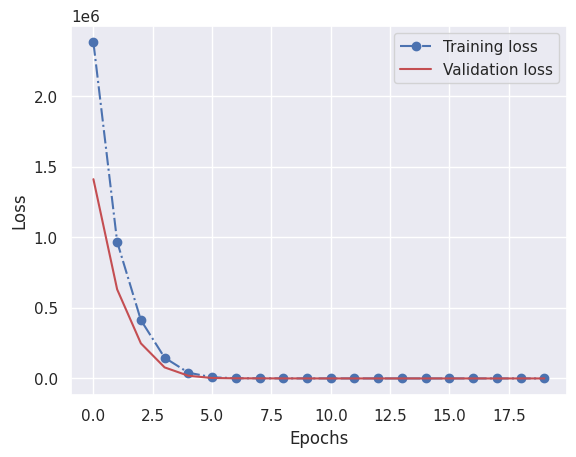

In [40]:
loss_tr = hd['loss']
loss_va = hd['val_loss']
epochs = range(0, ne)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.plot(epochs, loss_tr, '-.o', label='Training loss')
plt.plot(epochs, loss_va, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Dropout

- May help against overfitting
- by improving generalization

``The Dropout layer randomly sets input units to 0 with a frequency of `rate` at each step during training time,.."
https://keras.io/api/layers/regularization_layers/dropout/

In [41]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

#Old Syntax:
# from keras import layers

#Define your NN arch
def myNN(train_data):
#Initiate model:
    model = models.Sequential()
#First layer is special: It needs to match the shape of data:
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],), name='in'))
    model.add(layers.Dropout(0.15))
    # units = 64: # of neurons; determines output shape of the layer.
    # input_shape: how many W needed per neuron?
    # Thus: input arrays of shape (*, 13). Output arrays of shape: (*, 64)
#Hidden layers will auto-size their input based the previous layer:
    model.add(layers.Dense(64, activation='relu', name='hidden1'))
    #Can add more layers here to make it deeper...
    model.add(layers.Dropout(0.15))

#Output: Need a single number as our prediction:
    model.add(layers.Dense(1, name='pred'))

    #Note that output layer has no activation
    # b/c this is a regression problem, not classification.
#How should the weights be calculated?
    model.compile(optimizer='rmsprop', loss='mse', metrics = ['mae'])
    return model


In [42]:
#build the model
model = myNN(Xtrain)

In [43]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 in (Dense)                  (None, 64)                896       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 hidden1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 pred (Dense)                (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


## Train/Test your model


In [44]:
#Train: a la scikit:
#Scikit: model.fit(Xtrain, ytrain)
ne = 10
model.fit(Xtrain, ytrain, epochs=ne, verbose=1) #, batch_size=1

#Evalute our model:
nnmse, nnmae = model.evaluate(Xtest, ytest, verbose = 1)
print('NN Test MAE: ', nnmae)

Epoch 1/10
12/12 [==============================] - 1s 2ms/step - loss: 687.1929 - mae: 21.1135
Epoch 2/10
12/12 [==============================] - 0s 2ms/step - loss: 456.5342 - mae: 16.6317
Epoch 3/10
12/12 [==============================] - 0s 2ms/step - loss: 315.4850 - mae: 14.1172
Epoch 4/10
12/12 [==============================] - 0s 3ms/step - loss: 269.9789 - mae: 12.8933
Epoch 5/10
12/12 [==============================] - 0s 3ms/step - loss: 239.7692 - mae: 11.7312
Epoch 6/10
12/12 [==============================] - 0s 2ms/step - loss: 170.8943 - mae: 10.0070
Epoch 7/10
12/12 [==============================] - 0s 2ms/step - loss: 166.7120 - mae: 10.0316
Epoch 8/10
12/12 [==============================] - 0s 2ms/step - loss: 133.7203 - mae: 8.8125
Epoch 9/10
12/12 [==============================] - 0s 3ms/step - loss: 127.1561 - mae: 8.6497
Epoch 10/10
4/4 [==============================] - 0s 3ms/step - loss: 43.1887 - mae: 4.2071
NN Test MAE:  4.207075119018555


## Summary

- Design our fist neural net to solve a regression problem
- Introduce tensorflow's Keras library
- Evaluating trained model
- Visualizing the loss
- Improvements:
  - Hidden layers
  - Pre-processing: Scaling
  - Dropout
